In [1]:
print("Hello World")

Hello World


In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
trainset = datasets.MNIST('data_train', download=True, train=True, transform=transform)
valset = datasets.MNIST('data_test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


In [5]:
dataiter = iter(trainloader)  # Get an iterator for train_loader
images, labels = next(dataiter)  # Use next() instead of .next()

print(images.shape)  # Shape of images
print(labels.shape)  # Shape of labels


torch.Size([64, 1, 28, 28])
torch.Size([64])


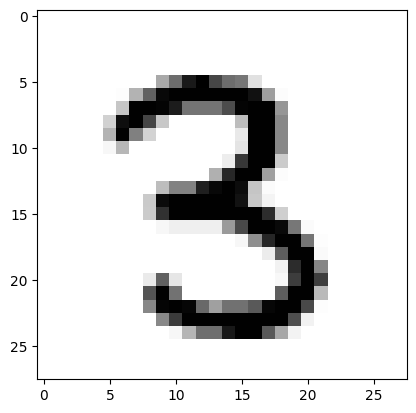

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

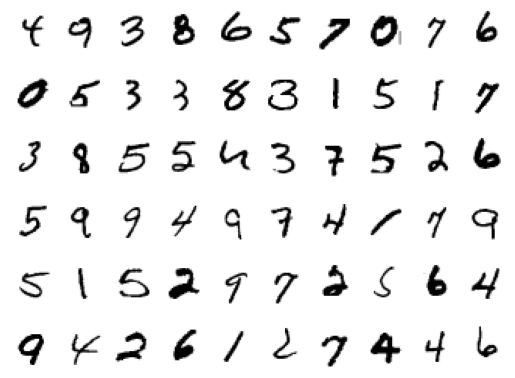

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [8]:
input_size = 784
hiddden_size = [128,64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hiddden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hiddden_size[0],hiddden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hiddden_size[1],output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logps = model(images)
loss = criterion(logps,labels)

In [10]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0045, -0.0045, -0.0045,  ..., -0.0045, -0.0045, -0.0045],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        [-0.0033, -0.0033, -0.0033,  ..., -0.0033, -0.0033, -0.0033],
        ...,
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003]])


In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6240898287181915
Epoch 1 - Training loss: 0.28451883169347797
Epoch 2 - Training loss: 0.21787975043423777
Epoch 3 - Training loss: 0.17520333344001632
Epoch 4 - Training loss: 0.1466401596225973
Epoch 5 - Training loss: 0.12587773460330867
Epoch 6 - Training loss: 0.11016280649464204
Epoch 7 - Training loss: 0.09770543214483762
Epoch 8 - Training loss: 0.0889740271214793
Epoch 9 - Training loss: 0.07936135266097322
Epoch 10 - Training loss: 0.07374335678347917
Epoch 11 - Training loss: 0.06676869228013607
Epoch 12 - Training loss: 0.06248959745796743
Epoch 13 - Training loss: 0.05711318940251395
Epoch 14 - Training loss: 0.05324730988982112

Training Time (in minutes) = 2.714337960879008


In [12]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logps = model(img)
        
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count+=1
        all_count+=1
        
print("Number Of Images Tested=", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested= 10000

Model Accuracy = 0.9764


In [24]:
torch.save(model.state_dict(), 'handwritten_model_weights.pth')

In [14]:
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [27]:
from torchvision import transforms
from PIL import Image

transform = transforms.Compose([
    transforms.Grayscale(),  
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

image_path = input("Enter the path of the image: ") 
img = Image.open(image_path)
img = transform(img)
img = img.view(1, 784)  

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)  
prediction = torch.argmax(ps, dim=1).item()
print(f"Predicted Digit: {prediction}")


Predicted Digit: 4


In [25]:
import torch
print(torch.__version__)


2.6.0+cpu


In [26]:
!pip install --upgrade torch


In [ ]:
pip uninstall torch
pip install torch
